In [40]:
# K-MEANS 분류 코드 (Iris 데이터셋 사용)

In [41]:
# install
!pip install scikit-learn
!pip install matplotlib

In [42]:
# import
from sklearn.datasets import load_iris
from collections import Counter
import math
import random
import matplotlib.pyplot as plt

Iris dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Iris data columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


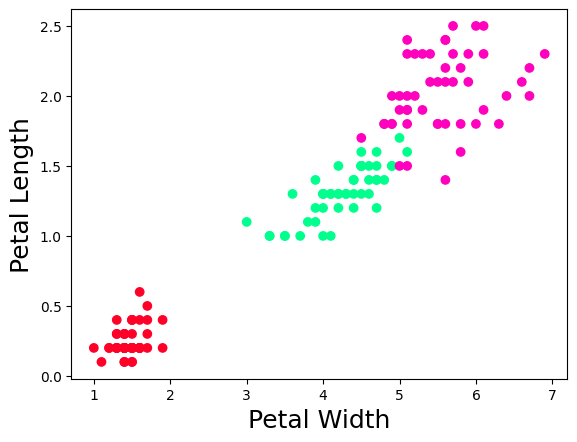

In [43]:
# 데이터 불러와서 분포 확인: 비율 차이가 클 경우 데이터를 추가 수집하는 것이 좋음
iris = load_iris()

print("Iris dataset keys:", iris.keys())
print("Iris data columns:", iris.feature_names)

X = iris.data[:, 2:]
y = iris.target

plt.scatter(X[:,0], X[:,1], c = y, cmap ='gist_rainbow')
plt.xlabel('Petal Width', fontsize = 18)
plt.ylabel('Petal Length', fontsize = 18)
plt.show()

k = 3 # 클러스터 개수 임의 지정
max_iters = 100 # 중심점 변화가 계속 일어날 경우를 방지하고자 최대 반복 횟수 지정

In [44]:
# 초기 중심점으로 k개의 샘플 랜덤 선택
centroids = random.sample(list(X), k)
print(f"{k}개의 선택된 샘플의 중심점:")
for c in centroids:
    print(c)

3개의 선택된 샘플의 중심점:
[5. 2.]
[6.6 2.1]
[6.9 2.3]


In [45]:
# 유클리드 거리 계산 함수
def euclidean_distance(point1, point2):
  distance = 0
  for i in range(len(point1)):
    distance += (point1[i] - point2[i])**2
  return math.sqrt(distance)

In [46]:
for iteration in range(max_iters):
    clusters = [[] for _ in range(k)]

# 각 중심점까지 거리 계산
    for point_1 in X:
      distances = [euclidean_distance(point_1, point_2) for point_2 in centroids]
      closest_index = distances.index(min(distances))
      clusters[closest_index].append(point_1)

# 새로운 중심점 계산
    new_centroids = []
    for cluster in clusters:
      centroid = [sum(dim)/len(cluster) for dim in zip(*cluster)]
      new_centroids.append(centroid)

# 중심점 변화가 없으면 종료
    converged = all(
        sum((centroids[i][j] - new_centroids[i][j])**2 for j in range(len(centroids[i]))) < 1e-4
        for i in range(k))

    centroids = new_centroids

    if converged:
        print(f"총 반복 횟수: {iteration+1}")
        break

총 반복 횟수: 11


In [47]:
predictions = []
for point_1 in X:
    distances = [euclidean_distance(point_1, point_2) for point_2 in centroids]
    closest_index = distances.index(min(distances))
    predictions.append(closest_index)

3개의 클러스터별 데이터 개수:
클러스터 0: 50개
클러스터 1: 54개
클러스터 2: 46개


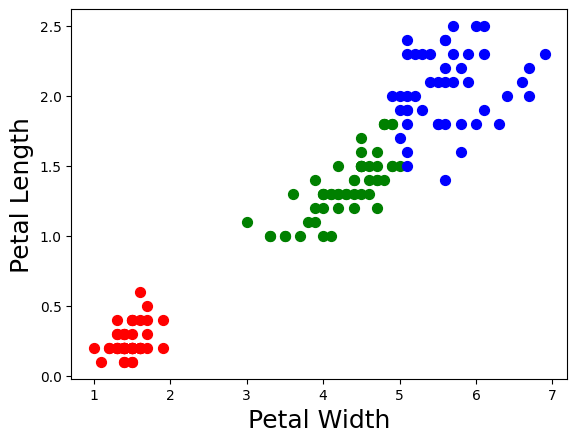

In [48]:
# 클러스터별 데이터 개수 확인
cluster_counts = [predictions.count(i) for i in range(k)]
print(f"{k}개의 클러스터별 데이터 개수:")
for i, count in enumerate(cluster_counts):
    print(f"클러스터 {i}: {count}개")

# 산점도로 결과 확인
colors = ['r', 'g', 'b']

for cluster_id in range(k):
    cluster_points = [X[i] for i in range(len(X)) if predictions[i] == cluster_id]
    plt.scatter(
        [p[0] for p in cluster_points],
        [p[1] for p in cluster_points],
        s=50,
        color=colors[cluster_id % len(colors)],
        label=f'Cluster {cluster_id}'
    )

plt.xlabel('Petal Width', fontsize = 18)
plt.ylabel('Petal Length', fontsize = 18)
plt.show()